<a href="https://colab.research.google.com/github/Khislatz/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Khislat_Zhuraeva_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Replicate the lesson code

In [0]:
# Categorical variables: contain a finite number of of catgories or disctinct groups. Example: gender, maternal type, payment method 
# Discrete variables: numeric values that have a countable/finite number of values 
# Continuous variables: numeric variables that have infinite number of values 

In [0]:
# Imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
#  '%' a 'magic' symbol to specify some non-python code

%matplotlib inline 

In [0]:
# We speify the 'plot style' we want to use with pandas and matplotlib
#'fast' is a default style so we don't necessarily have to set it. 
plt.style.use('fast')

In [0]:
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

## **Part1: Pandas built-in visualization tool**




In [0]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
#cabin class is a categorical variable 
# It csn be displayed using either number or string values 
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

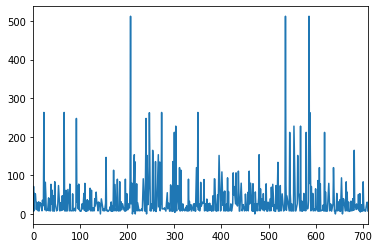

In [0]:
df['Fare'].plot();

In [0]:
#convert a numerical variable "Pcalss" into a categorical "cabin_class"
df['cabin_class'] = df['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


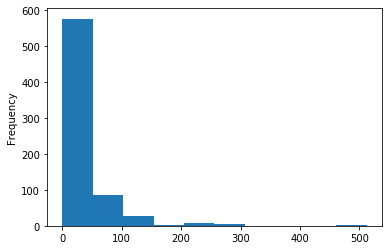

In [0]:
# Fare is a continuous variable, so we can disply it with a histogram
#df['Fare'].plot(kind='line');  kind= line is a default but in this example we are going to replace it with kind = 'hist'

df['Fare'].plot(kind='hist');

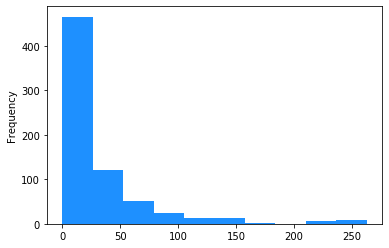

In [0]:
# Remove extreme outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [0]:
# A countinuous variable can be converted to a categorical variable using binning 
farebins = [0, 8, 15, 33, 512] # 5 cut points therefore 4 different groups 
farelabels = ['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels) #when we use pd.cut we have to specify which column will be cut, in this case it is df['Fare']
# farelabels variable is optional. if we do not create it, it will be generate on its own
# while fareins are mandatory indicate the points at which the variables have to be cut  
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()

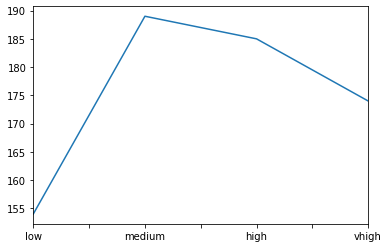

In [0]:
myresults.plot();
# right now the range is starting at 155

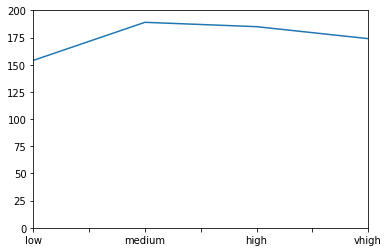

In [0]:
# sometimes it is important to specify the range of your y-axis to get more accurate results. 'lim' = limits
myresults.plot(ylim=(0,200));

## Display a single continuous variable 

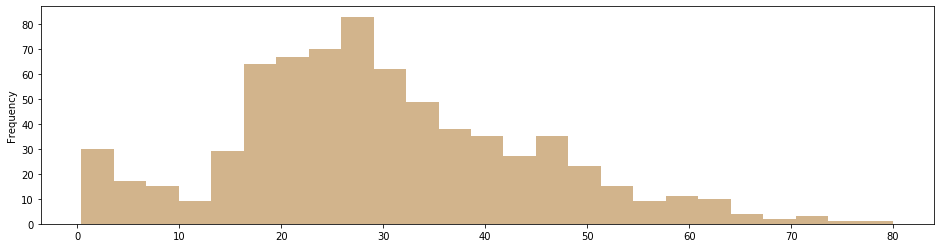

In [0]:
# Histogram
df['Age'].head()
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan'); # universal syntax: figure size and color; while bins can only be used in histograms

In [0]:
# Stacked histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==3]['Age'] # All the ages of the 1 class

0      22.0
2      26.0
4      35.0
6       2.0
7      27.0
       ... 
703    33.0
704    22.0
706    25.0
707    39.0
711    32.0
Name: Age, Length: 355, dtype: float64

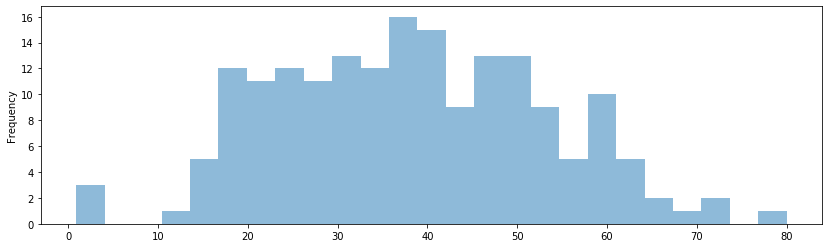

In [0]:
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5); #alpha means transparency. in this case 0.5 is half transparent 

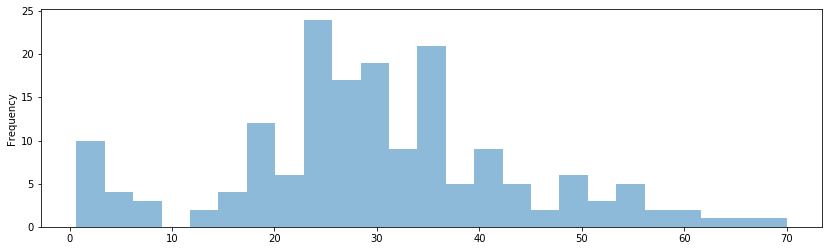

In [0]:
#we can do the same thing with the second and third class passangers and combine all the graphs together
#2nd class
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5); 

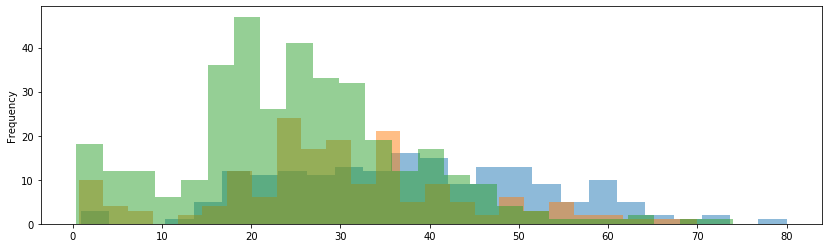

In [0]:
#combining together all 3 classes

df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);


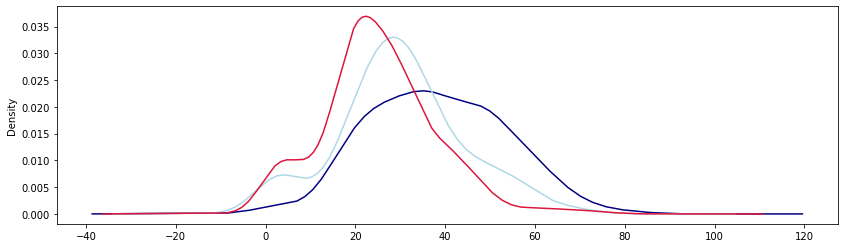

In [0]:
# But this is actually easier to read using a Kernel Density Estimate (KDE).
#Note the use of 'Xlim'

df[df['Pclass']==1]['Age'].plot(kind='density', figsize=(14,4), color = 'navy');
df[df['Pclass']==2]['Age'].plot(kind='density', figsize=(14,4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', figsize=(14,4), color='crimson');

#some passangers are -40 and some are 120. We can eliminate inaccurate data using xlim

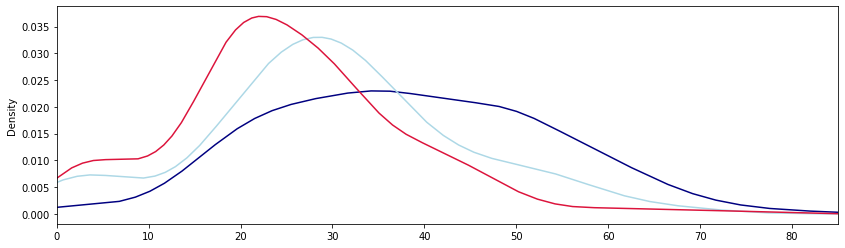

In [0]:
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color = 'navy');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='crimson');

# Display a single categorical variable 

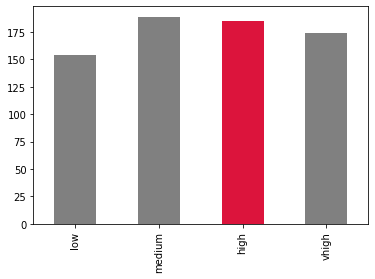

In [0]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray']);

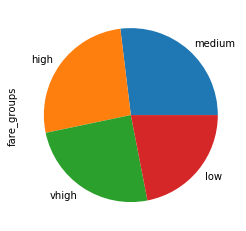

In [0]:
# Pie chart. 

df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

## Compare 2 categorical variables 

In [0]:
# Compare 2 categorical variables using crosstab 
cab_survived = pd.crosstab(df['cabin_class'], df['Survived']) # how many people survived from each class
cab_survived

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


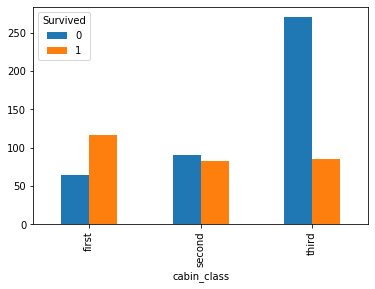

In [0]:
# Make that into a bar chart 
cab_survived.plot(kind='bar');

In [0]:
# Crosstab with column percents
cab_survived1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_survived1 

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


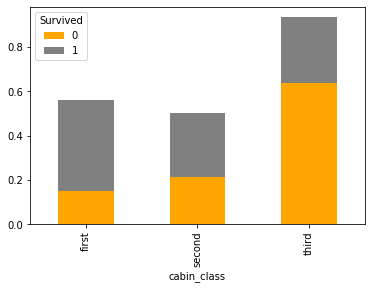

In [0]:
# Make a stacked bar chart, for easy comparison of 2 categorical variables. Note the ue of 'barh'

cab_survived1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
# Crosstab with column percents
cab_survived2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_survived2 

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


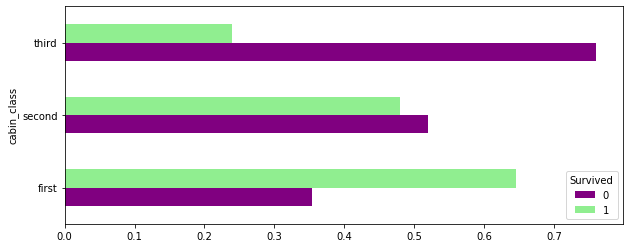

In [0]:
cab_survived2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

Compare categorical and continuous variables

In [0]:
# Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [0]:
# Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
df.groupby('cabin_class').mean() # it calculates means for all the variables. 

,Survived,Pclass,Age,Fare
cabin_class,,,,
first,0.646409,1.0,38.151492,81.015838
second,0.479769,2.0,29.877630,21.471556
third,0.239437,3.0,25.140620,13.229435


In [0]:
#We can also specify a varibale 
df.groupby('cabin_class')['Age'].mean() # this way it calculates mean of Age only

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

In [0]:
cab_age = df.groupby('cabin_class')['Age'].mean() 
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

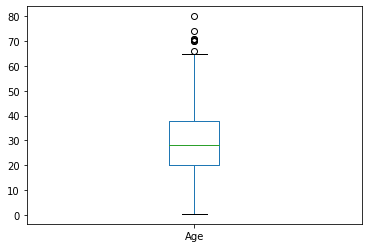

In [0]:
# To visualize a single continuous variable, you can just use `.plot` with `kind=box`
df['Age'].plot(kind='box');

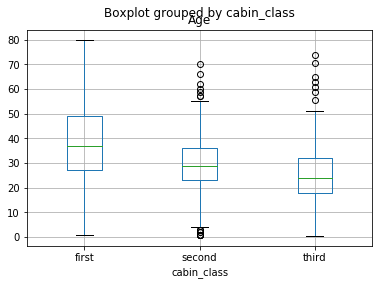

In [0]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin_class'); # by is a groupby

## Compare two or three continuous variables

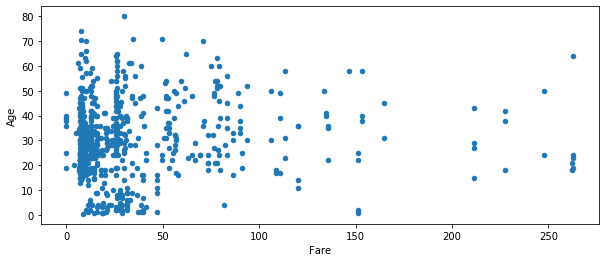

In [0]:
# Two continuous variables: age by fare
df.plot(kind='scatter', x='Fare', y='Age', figsize=(10,4));

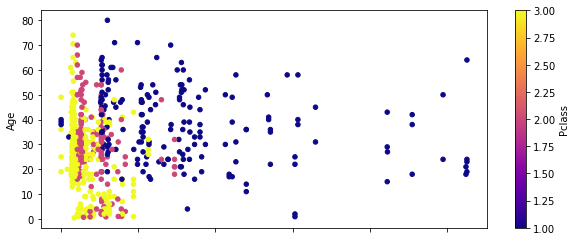

In [0]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(10,4)); #c  is a 'z' axis 

## Use a line plot to examine two continuous variables (often time)

In [0]:
# line chart: age by fare
df.groupby('Age')['Fare'].mean()
# for every age there is a mean fare. Among all people who were 70 yo, on average a 70 yo paid about $40.75. Some data is inaccurate 
# 0.92 yo person paid $151.5, which means that there might have been only one person of that age, that's what causes disrepancy


Age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: Fare, Length: 88, dtype: float64

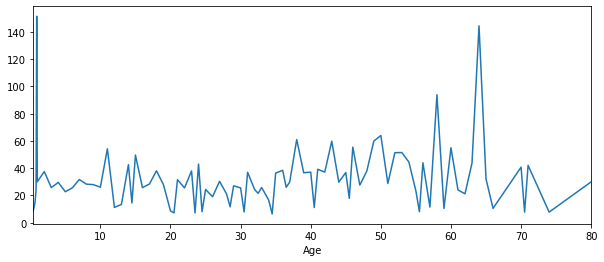

In [0]:
df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4)); 

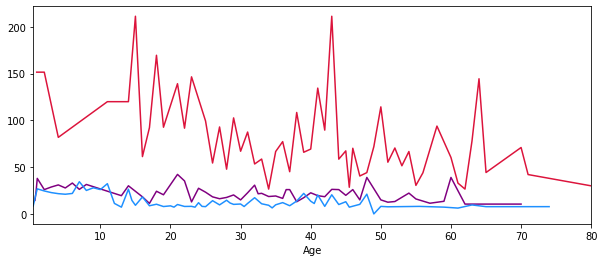

In [0]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) 
# you can just loop through the values.
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10,4), color=mycolors[x-1])

## Compare Multiple continuous variables 

In [0]:
#Correlation matrix
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


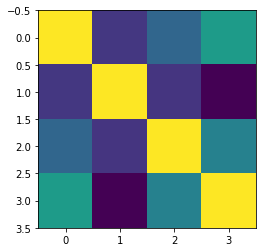

In [0]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

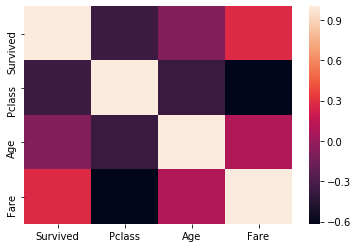

In [0]:
#Seaborn 
import seaborn as sns
sns.heatmap(corr_matrix);

## Into to MATPLOTLIB

Basic example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x **2

In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

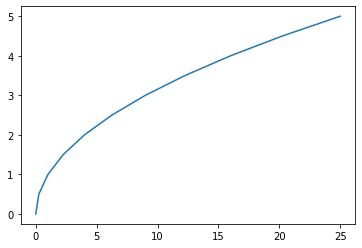

In [0]:
# a very simple plot, to get started. Notice that NO PANDAS is required!

plt.plot(y,x);    

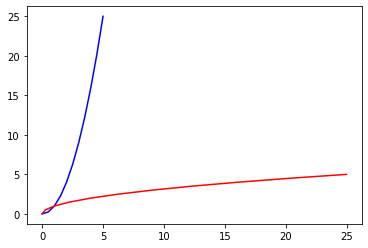

In [0]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x,y, 'b');
plt.plot(y, x, 'r');

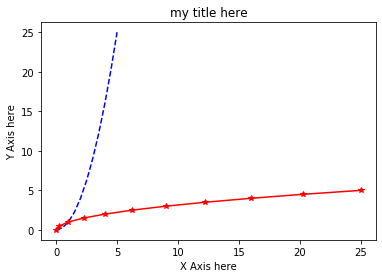

In [0]:
# Now add some labels, plus a little texture.
plt.plot(x,y, 'b--');
plt.plot(y, x, 'r*-');
plt.xlabel('X Axis here');
plt.ylabel('Y Axis here');
plt.title('my title here');

## Creating Multiplots on Same Canvas

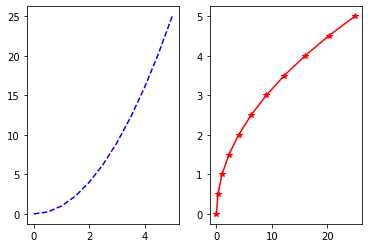

In [0]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)

# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x,y, 'b--');

plt.subplot(1,2,2);
plt.plot(y, x, 'r*-');

# **Matplotlib Object Oriented Method**
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

In Matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. We'll commonly use the variable name fig to refer to a figure instance, and ax to refer to an axes instance or group of axes instances. Once we have created an axes, we can use the ax.plot function to plot some data. https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

The .figure() method
# To begin we create a figure instance. Then we can add axes to that figure:

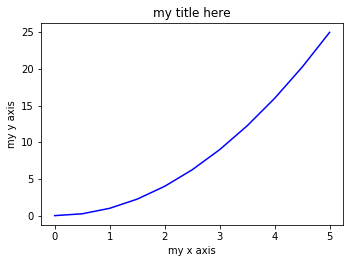

In [0]:
# Create Figure (empty canvas)
fig = plt.figure() #an instance of the class plt.Figure)
# Add set of axes to figure
# left, bottom, width, height (range 0 to 1)
axes = fig.add_axes([0.2, 0.2, 0.7, 0.7]) # an instance of the class plt.Axes
# Plot on that set of axes
axes.plot(x,y,'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my title here');
# Notice the use of set_ to begin methods

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

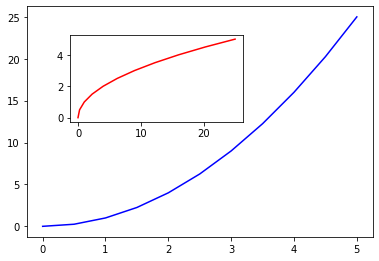

In [0]:
# Creates blank canvas
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2= fig.add_axes([0.2, 0.5, 0.4, 0.3])
# Larger Figure Axes 1
axes1.plot(x,y, 'b');

# Insert Figure Axes 2
axes2.plot(y,x, 'r');

# The subplots() method

The plt.subplots() object will act as a more automatic axis manager. It is somewhat more common than using .figure()

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

fig, ax = plt.subplots()
is more concise than this:

fig = plt.figure()
ax = fig.add_subplot(111)

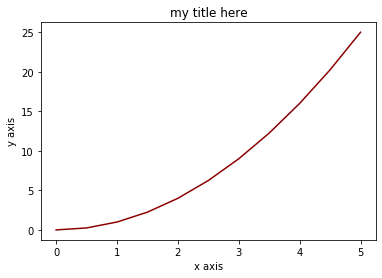

In [0]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1) 

# we can just write fig, axes = plt.subplots() 
# The default is `(1, 1)` so you don't actually have to specify this.

# Now use the axes object to add stuff to plot
axes.plot(x,y, 'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('my title here');

Then you can specify the number of rows and columns when creating the subplots() object:

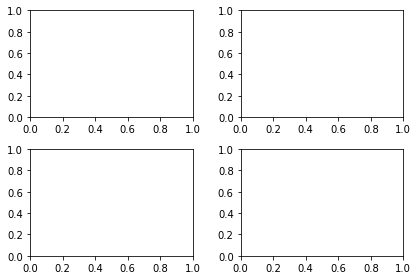

In [0]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2) # they are overlapping a lot; # 2 objects figs and axes. Once we have creates them 
#we start caling them  

# the parameter labels `nrows` and `ncols` are optional.
plt.tight_layout() 
# more about `.tight_layout()` below.

In [0]:
# Axes is an array of axes to plot on 
axes  # an array of mutliple objects 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b056c6208>,
      dtype=object)

We can iterate through this array:

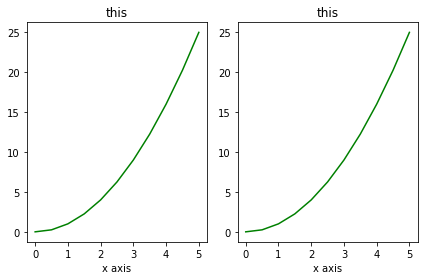

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# Display the figure object 
for ax in axes:
  ax.plot(x,y,'g')
  ax.set_xlabel('x axis')
  ax.set_title('this')
plt.tight_layout()

A common issue with matplolib is overlapping subplots or figures. We ca use fig.tight_layout() or plt.tight_layout() method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

Figure size, aspect ratio and DPI
Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the figsize and dpi keyword arguments.

figsize is a tuple of the width and height of the figure in inches
dpi is the dots-per-inch (pixel per inch).
For example:

In [0]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the subplots function:

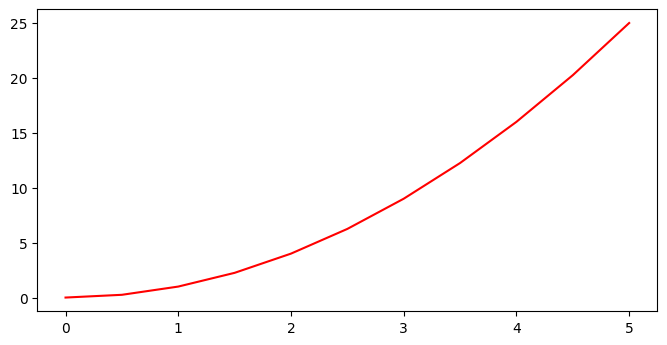

In [0]:
fig, axes = plt.subplots(figsize=(8,4), dpi=100)
axes.plot(x,y,'r');

# Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

To save a figure to a file we can use the savefig method in the Figure class:

In [0]:
fig.savefig('filename.png')

In [0]:
#Here we can also optionally specify the DPI and choose between different output formats:

In [0]:
fig.savefig('filename.png', dpi=200)

Legends
You can use the label="label text" keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure:

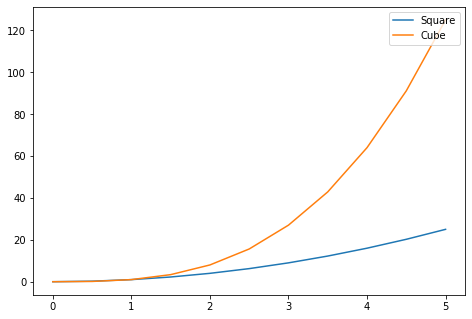

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label='Square')
ax.plot(x, x**3, label='Cube');
ax.legend(loc=1);

The legend function takes an optional keyword argument loc that can be used to specify where in the figure the legend is to be drawn. The allowed values of loc are numerical codes for the various places the legend can be drawn. See the documentation page for details. Some of the most common loc values are:

In [0]:
# Lots of options....
ax.legend(loc=1)
ax.legend(loc=5)
ax.legend(loc=9)
fig

# Try replacing the `loc` value with integers 1 through 10.
# let matplotlib decide the optimal location

Setting colors, linewidths, linetypes
Matplotlib gives you a lot of options for customizing colors, linewidths, and linetypes.

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

Colors with MatLab like syntax
With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where 'b' means blue, 'g' means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [0]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
# blue line with dots
ax.plot(x, x**2, 'b.-')
# green dashed line
ax.plot(y, x**3, 'g-*')

Colors with the color= parameter
We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments. Alpha indicates opacity.

In [0]:
fig, ax = plt.subplots()
# half-transparant
ax.plot(x, x+1, color='blue', alpha=0.5)
# RGB hex code
ax.plot(x, x+2, color='#8B008B', alpha=0.5)
# RGB hex code 
ax.plot(x, x+3, color='#FF8C00', alpha=0.5);

Line and marker styles
To change the line width, we can use the linewidth or lw keyword argument. The line style can be selected using the linestyle or ls keyword arguments:

In [0]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

Control over axis appearance
In this section we will look at controlling axis sizing properties in a matplotlib figure.

Plot range
We can configure the ranges of the axes using the set_ylim and set_xlim methods in the axis object, or axis('tight') for automatically getting "tightly fitted" axes ranges:

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Imitate a real-world example

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# what styles are available in matplotlib? There's one for 538.
plt.style.available


In [0]:
plt.style.use('fivethirtyeight')

In [0]:
# Create fake data to replicate the blog post figure.
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

In [0]:
# replicate the figure post
fake= pd.Series(fakelist, index=range(1,11))
fake.plot.bar(color='C1', width=0.9);

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [0]:
fake2 = pd.Series(fakelist2)

In [0]:
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="None")

# Set the bars
fake.plot.bar(width=0.9, color="#FF8000")

ax.set(facecolor="None")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold',
             alpha=0.5
            )
# Removing frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.tight_layout()
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42, alpha=0.5);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9, fontweight='bold')
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold')

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), fontsize = 9, color='w', rotation=360)
ax.set_yticklabels(range(0,50,10), fontsize = 9, color='w', rotation=0)
ax.set_yticks(range(0,50,10));

In [0]:
display(example)

## ASSIGNMENT 

In [420]:
from IPython.display import display, Image

url1 = 'https://fivethirtyeight.com/wp-content/uploads/2014/05/hickey-datalab-steak.png?w=575.png'
steak= Image(url=url1, width=700)

display(steak)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [0]:
#Read in the steak dataset 
url2 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv'

survey_df = pd.read_csv(url2)
survey_df.head()



,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


In [0]:
steak_df = survey_df[['RespondentID','How do you like your steak prepared?']]
steak_df.head()

,RespondentID,How do you like your steak prepared?
0,NaN,Response
1,3.237566e+09,NaN
2,3.234982e+09,Medium rare
3,3.234973e+09,Rare
4,3.234972e+09,Medium


In [0]:
steak_df = steak_df.dropna()

In [0]:
steak_df.drop(steak_df.index[5])
steak_df['How do you like your steak prepared?'].value_counts()

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Name: How do you like your steak prepared?, dtype: int64

In [0]:
st_df = steak_df['How do you like your steak prepared?']
st_df.value_counts()

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Name: How do you like your steak prepared?, dtype: int64

[]

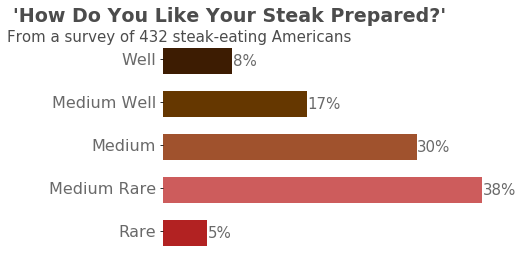

In [447]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

# Set the bars
ax = st_df.value_counts().sort_index().plot(kind='barh', figsize=(20,10),
                                            color=('firebrick', 'indianred','sienna', 'xkcd:brown','xkcd:chocolate'), 
                                            ax=ax)
y = [23,166,132,75,36]
fig, ax = plt.subplots()    
fig.patch.set(facecolor="white")
width = 0.6 # the width of the bars 
# the x loctions for the groups
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color=('firebrick', 'indianred','sienna', 'xkcd:brown','xkcd:chocolate'))
ax.set_yticks(ind+width/15)
ax.set_yticklabels(['Rare', 'Medium Rare', 'Medium', 'Medium Well', 'Well'], color='dimgray', minor=False, va = 'center', fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.4, i.get_y()+.2, \
            str(math.trunc((i.get_width()/total)*100))+'%', fontsize=15,
color='dimgrey')

# Removing frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title(("'How Do You Like Your Steak Prepared?'"), y=1.05, x=0.2, fontsize=19, fontweight='bold', alpha=0.7 ) 
fig.suptitle('From a survey of 432 steak-eating Americans', fontsize=15, x=0.163, 
             y=0.91, alpha=0.7)
ax.set_xticks([])
ax.set_xticklabels([])

In [421]:

display(steak)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here